# Fashion with TF

# READ ME. No seriously, READ ME:
    This exercise builds a CNN for visual classification of clothing types (coded from 0 to 9).
    The dataset is made up by 60000 images of 28x28 pixels but for learning purposes we will take a random sample of 500 images for training.
    ( Validation and Test samples are unchanged)
    The small sample will allow us to play with several types of CNN's layers in tf.keras without having to wait 30 min for a test. 
    Once the correct input for the image is inserted the MODEL DEFINITION part the code will already run. The hyperparameters are also trivial for testing purposes.
    The challange is to build the CNN correctly and score an accuracy of above 90% with the lowest computational time. 

## Importing Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

/home/clemente/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data() # RUN-ME to automatically download the dataset
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [3]:
#Random sampling
import random
red_index = random.sample(range(60000), 500) # Generating a random series of 500 numbers between 0-60000

x_train_red = np.empty([500,28,28]) # Generating an empty np array with the same shape as the original training set
y_train_red = np.empty([500])

j = 0 # Initializing internal counter to loop over the new array
for i in red_index: # for every value in the random array
    
    x_train_red[j] = x_train[i] # use the random value as and index and copy the content into the new array
    y_train_red[j] = y_train[i]
    j += 1

y_train_red = y_train_red.astype(int)

In [4]:
y_train_red[34]

0

0


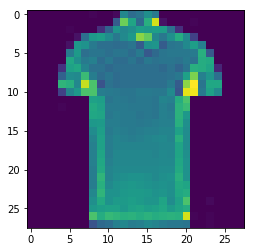

In [5]:
print(y_train_red[34]) # check if the classification is correct
plt.imshow(x_train_red[34]) # Ok the random slice seems to be working fine...

#### Data Exploration

x_train shape: (500, 28, 28) y_train shape: (500,)
500 train set
10000 test set
y = 0 T-shirt/top


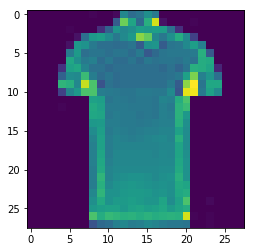

In [6]:
# Print training set shape - note there are 60,000 training data of image size of 28x28, 60,000 train labels)
print("x_train shape:", x_train_red.shape, "y_train shape:", y_train_red.shape)

# Print the number of training and test datasets
print(x_train_red.shape[0], 'train set')
print(x_test.shape[0], 'test set')

# Define the text labels
fashion_mnist_labels = ["T-shirt/top",  # index 0
                        "Trouser",      # index 1
                        "Pullover",     # index 2 
                        "Dress",        # index 3 
                        "Coat",         # index 4
                        "Sandal",       # index 5
                        "Shirt",        # index 6 
                        "Sneaker",      # index 7 
                        "Bag",          # index 8 
                        "Ankle boot"]   # index 9

# Image index, you can pick any number between 0 and 59,999
img_index = 34
# y_train contains the lables, ranging from 0 to 9
label_index = y_train_red[img_index]
# Print the label, for example 2 Pullover
print ("y = " + str(label_index) + " " +(fashion_mnist_labels[label_index]))
# # Show one of the images from the training dataset
plt.imshow(x_train_red[img_index])

#### Data Normalization

In [7]:
x_train_red = x_train_red.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of train data - " + str(len(x_train_red)))
print("Number of test data - " + str(len(x_test)))

Number of train data - 500
Number of test data - 10000


### Data Preprocessing

In [8]:
# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(x_train, x_valid) = x_train[5000:], x_train[:5000] 
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# Reshape input data from (28, 28) to (28, 28, 1)
w, h = 28, 28
x_train_red = x_train_red.reshape(x_train_red.shape[0], w, h, 1)
x_valid = x_valid.reshape(x_valid.shape[0], w, h, 1)
x_test = x_test.reshape(x_test.shape[0], w, h, 1)

# One-hot encode the labels
y_train_red = tf.keras.utils.to_categorical(y_train_red, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Print training set shape
print("x_train shape:", x_train_red.shape, "y_train shape:", y_train_red.shape)

# Print the number of training, validation, and test datasets
print(x_train_red.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

x_train shape: (500, 28, 28, 1) y_train shape: (500, 10)
500 train set
5000 validation set
10000 test set


#### Model Definition |TO DO|: build your own CNN

In [9]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28, 28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
"""
From doc:
2D convolution layer (e.g. spatial convolution over images).

This layer creates a convolution kernel that is convolved with 
the layer input to produce a tensor of outputs. If use_bias is True, 
a bias vector is created and added to the outputs. Finally, if activation is not None, it is applied to the outputs as well.

When using this layer as the first layer in a model, provide the keyword argument input_shape (tuple of integers, does not include the sample axis),
e.g. input_shape=(128, 128, 3) for 128x128 RGB pictures in data_format="channels_last".
"""

#TO DO: Add two more convolutional layers

#TO DO: Reshaping the (500, 10) matrix with a Flattening layers

#TO DO: Add another dense layer after the flattening. (keep the activation='relu')

#The last layers is a dense layer with softmax activation that classifies the 10 categories of data in fashion_mnist.
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 10)                501770    
Total params: 502,090
Trainable params: 502,090
Non-trainable params: 0
_________________________________________________________________


#### Model Configuration

In [10]:
# Choosing Gradient Descent and loss function
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

#### Model Training - TO DO: Set the parameters

In [11]:
from keras.callbacks import ModelCheckpoint
#WARNING Commenting out for writng priviledges
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose = 1, save_best_only=True)
#NB: Trivial batch size and epochs for local testing purposes
model.fit(x_train_red,
         y_train_red,
         batch_size=3,
         epochs=2,
         validation_data=(x_test, y_test),
         callbacks=[checkpointer])

Using TensorFlow backend.


Train on 500 samples, validate on 10000 samples
Epoch 1/2
495/500 [============================>.] - ETA: 0s - loss: 1.2102 - acc: 0.5697
Epoch 00001: val_loss improved from inf to 0.80838, saving model to model.weights.best.hdf5
500/500 [==============================] - 12s 25ms/step - loss: 1.2131 - acc: 0.5680 - val_loss: 0.8084 - val_acc: 0.7225
Epoch 2/2
495/500 [============================>.] - ETA: 0s - loss: 0.4956 - acc: 0.8303
Epoch 00002: val_loss improved from 0.80838 to 0.70594, saving model to model.weights.best.hdf5
500/500 [==============================] - 11s 23ms/step - loss: 0.5091 - acc: 0.8280 - val_loss: 0.7059 - val_acc: 0.7559


#### Model Evaluation

In [12]:
# Load the weights with the best validation accuracy - #WARNING Commenting out for writng priviledges
model.load_weights('model.weights.best.hdf5')

In [13]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)

# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.7559


#### Visualizing predictions

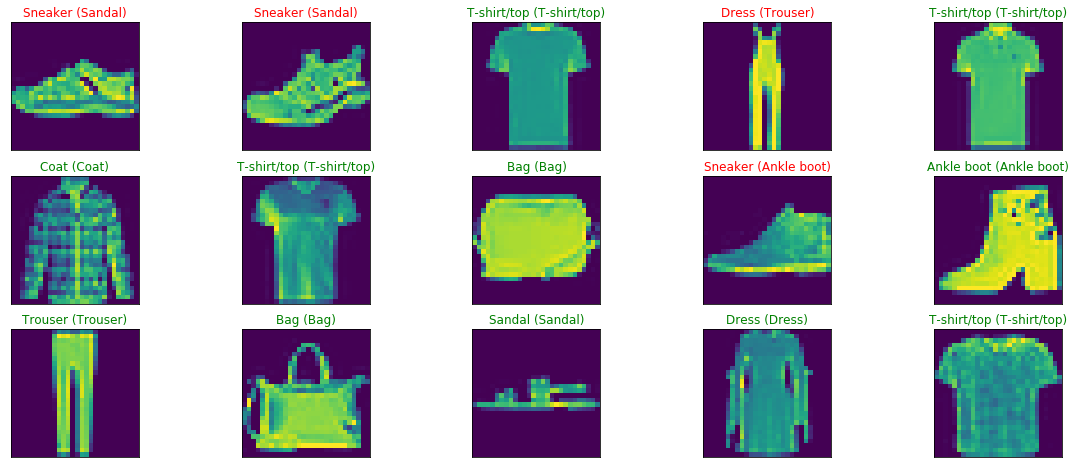

In [14]:
y_hat = model.predict(x_test)

# Plot a random sample of 10 test images, their predicted labels and ground truth
figure = plt.figure(figsize=(20, 8))
for i, index in enumerate(np.random.choice(x_test.shape[0], size=15, replace=False)):
    ax = figure.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    # Display each image
    ax.imshow(np.squeeze(x_test[index]))
    predict_index = np.argmax(y_hat[index])
    true_index = np.argmax(y_test[index])
    # Set the title for each image
    ax.set_title("{} ({})".format(fashion_mnist_labels[predict_index], 
                                  fashion_mnist_labels[true_index]),
                                  color=("green" if predict_index == true_index else "red"))